# Hollywood Marked

### Загружаем датафреймы

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
TopProductionMethod = pd.read_csv("/Users/amirhan/Downloads/archive-2/TopProductionMethods.csv")
TopDistributors = pd.read_csv("/Users/amirhan/Downloads/archive-2/TopDistributors.csv")
TopGenres = pd.read_csv("/Users/amirhan/Downloads/archive-2/TopGenres.csv")
PopularCreativeTypes = pd.read_csv("/Users/amirhan/Downloads/archive-2/PopularCreativeTypes.csv")
TopGrossingRatings = pd.read_csv("/Users/amirhan/Downloads/archive-2/TopGrossingRatings.csv")
TopGrossingSources = pd.read_csv("/Users/amirhan/Downloads/archive-2/TopGrossingSources.csv")
HighestGrossers = pd.read_csv("/Users/amirhan/Downloads/archive-2/HighestGrossers.csv")
AnnualTicketSales = pd.read_csv("/Users/amirhan/Downloads/archive-2/AnnualTicketSales.csv",thousands = ',')
WideReleasesCount = pd.read_csv("/Users/amirhan/Downloads/archive-2/WideReleasesCount.csv")

### Анализ продаж билетов

In [3]:
AnnualTicketSales.head()

,YEAR,TICKETS SOLD,TOTAL BOX OFFICE,TOTAL INFLATION ADJUSTED BOX OFFICE,AVERAGE TICKET PRICE,Unnamed: 5
0,2021,423774881,"$3,881,777,912","$3,881,777,912",$9.16,NaN
1,2020,223638958,"$2,048,534,616","$2,048,534,616",$9.16,NaN
2,2019,1228541629,"$11,253,443,955","$11,253,444,050",$9.16,NaN
3,2018,1311536128,"$11,948,096,650","$12,013,670,952",$9.11,NaN
4,2017,1225639761,"$10,993,991,460","$11,226,860,216",$8.97,NaN


In [4]:
# Чистим папку
AnnualTicketSales['TOTAL BOX OFFICE'] = AnnualTicketSales['TOTAL BOX OFFICE'].str.replace(',', '')
AnnualTicketSales['TOTAL BOX OFFICE'] = AnnualTicketSales['TOTAL BOX OFFICE'].str.replace('$', '')

AnnualTicketSales['TOTAL INFLATION ADJUSTED BOX OFFICE'] = AnnualTicketSales['TOTAL INFLATION ADJUSTED BOX OFFICE'].str.replace(',', '')
AnnualTicketSales['TOTAL INFLATION ADJUSTED BOX OFFICE'] = AnnualTicketSales['TOTAL INFLATION ADJUSTED BOX OFFICE'].str.replace('$', '')

AnnualTicketSales['AVERAGE TICKET PRICE'] = AnnualTicketSales['AVERAGE TICKET PRICE'].str.replace(',', '')

AnnualTicketSales.drop('Unnamed: 5', axis=1, inplace=True)

/var/folders/0b/rfzwkbw94z36w4d3xrxrx1600000gn/T/ipykernel_52631/3233489399.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  AnnualTicketSales['TOTAL BOX OFFICE'] = AnnualTicketSales['TOTAL BOX OFFICE'].str.replace('$', '')
/var/folders/0b/rfzwkbw94z36w4d3xrxrx1600000gn/T/ipykernel_52631/3233489399.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  AnnualTicketSales['TOTAL INFLATION ADJUSTED BOX OFFICE'] = AnnualTicketSales['TOTAL INFLATION ADJUSTED BOX OFFICE'].str.replace('$', '')


In [5]:
AnnualTicketSales['TOTAL BOX OFFICE'] = AnnualTicketSales['TOTAL BOX OFFICE'].astype(int)

In [8]:
AnnualTicketSales['AVERAGE TICKET PRICE'] = AnnualTicketSales['AVERAGE TICKET PRICE'].str.replace('$', '')
AnnualTicketSales

/var/folders/0b/rfzwkbw94z36w4d3xrxrx1600000gn/T/ipykernel_52631/249605966.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  AnnualTicketSales['AVERAGE TICKET PRICE'] = AnnualTicketSales['AVERAGE TICKET PRICE'].str.replace('$', '')


,YEAR,TICKETS SOLD,TOTAL BOX OFFICE,TOTAL INFLATION ADJUSTED BOX OFFICE,AVERAGE TICKET PRICE
0,2021,423774881,3881777912,3881777912,9.16
1,2020,223638958,2048534616,2048534616,9.16
2,2019,1228541629,11253443955,11253444050,9.16
3,2018,1311536128,11948096650,12013670952,9.11
4,2017,1225639761,10993991460,11226860216,8.97
5,2016,1302556378,11267115924,11931416424,8.65
6,2015,1323356776,11155900636,12121948075,8.43
7,2014,1257402920,10272985008,11517810744,8.17
8,2013,1339168926,10887446341,12266787382,8.13
9,2012,1380921942,10992141616,12649244986,7.96


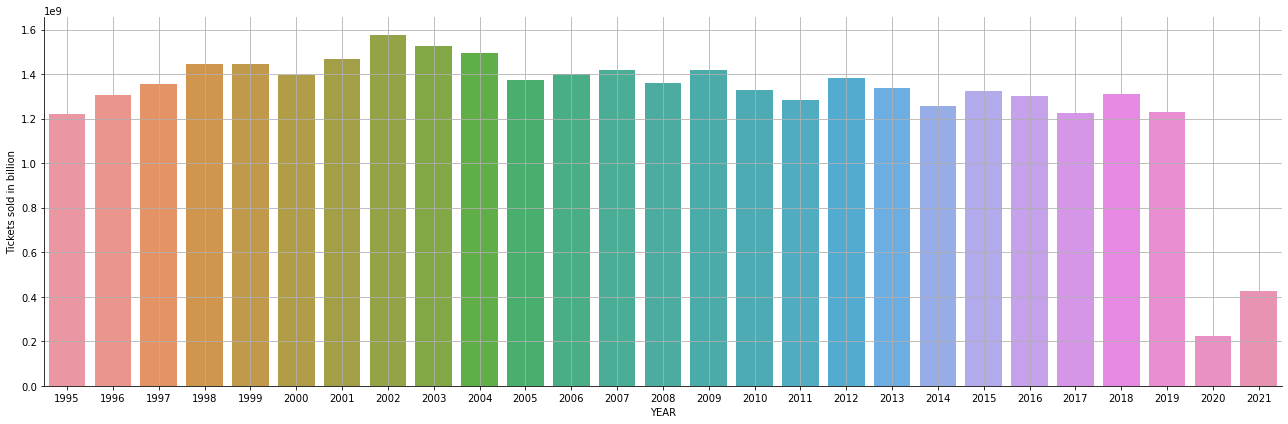

In [9]:
ax = sns.catplot(y='TICKETS SOLD', x='YEAR', kind='bar', data=AnnualTicketSales, height=6, aspect=3)
plt.ylabel('Tickets sold in billion')
plt.grid(True)

### HighestGrosssers

In [10]:
HighestGrossers.head()

,YEAR,MOVIE,GENRE,MPAA RATING,DISTRIBUTOR,TOTAL FOR YEAR,TOTAL IN 2019 DOLLARS,TICKETS SOLD
0,1995,Batman Forever,Drama,PG-13,Warner Bros.,"$184,031,112","$387,522,978","4,23,06,002"
1,1996,Independence Day,Adventure,PG-13,20th Century Fox,"$306,169,255","$634,504,608","6,92,69,062"
2,1997,Men in Black,Adventure,PG-13,Sony Pictures,"$250,650,052","$500,207,943","5,46,07,854"
3,1998,Titanic,Adventure,PG-13,Paramount Pictures,"$443,319,081","$865,842,808","9,45,24,324"
4,1999,Star Wars Ep. I: The Phantom Menace,Adventure,PG,20th Century Fox,"$430,443,350","$776,153,749","8,47,32,942"


In [11]:
HighestGrossers['TOTAL FOR YEAR'] = HighestGrossers['TOTAL FOR YEAR'].str.replace(',','')
HighestGrossers['TOTAL FOR YEAR'] = HighestGrossers['TOTAL FOR YEAR'].str.replace('$','')

HighestGrossers['TOTAL IN 2019 DOLLARS'] = HighestGrossers['TOTAL IN 2019 DOLLARS'].str.replace(',','')
HighestGrossers['TOTAL IN 2019 DOLLARS'] = HighestGrossers['TOTAL IN 2019 DOLLARS'].str.replace('$','')

HighestGrossers['TICKETS SOLD'] = HighestGrossers['TICKETS SOLD'].str.replace(',','')

/var/folders/0b/rfzwkbw94z36w4d3xrxrx1600000gn/T/ipykernel_52631/360255369.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  HighestGrossers['TOTAL FOR YEAR'] = HighestGrossers['TOTAL FOR YEAR'].str.replace('$','')
/var/folders/0b/rfzwkbw94z36w4d3xrxrx1600000gn/T/ipykernel_52631/360255369.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  HighestGrossers['TOTAL IN 2019 DOLLARS'] = HighestGrossers['TOTAL IN 2019 DOLLARS'].str.replace('$','')


In [12]:
HighestGrossers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   YEAR                   27 non-null     int64 
 1   MOVIE                  27 non-null     object
 2   GENRE                  24 non-null     object
 3   MPAA RATING            27 non-null     object
 4   DISTRIBUTOR            27 non-null     object
 5   TOTAL FOR YEAR         27 non-null     object
 6   TOTAL IN 2019 DOLLARS  27 non-null     object
 7   TICKETS SOLD           27 non-null     object
dtypes: int64(1), object(7)
memory usage: 1.8+ KB


In [13]:
HighestGrossers['TOTAL FOR YEAR'] = HighestGrossers['TOTAL FOR YEAR'].astype(int)

In [141]:
df1 = pd.DataFrame(HighestGrossers, columns=['YEAR','MOVIE','TOTAL FOR YEAR'])
df1.sort_values(by=['TOTAL FOR YEAR'], ascending=False, inplace=True)

In [146]:
df1

,YEAR,MOVIE,TOTAL FOR YEAR
24,2019,Avengers: Endgame,858373000
20,2015,Star Wars Ep. VII: The Force Awakens,742208942
23,2018,Black Panther,700059566
17,2012,The Avengers,623357910
13,2008,The Dark Knight,531001578
22,2017,Star Wars Ep. VIII: The Last Jedi,517218368
21,2016,Finding Dory,486295561
3,1998,Titanic,443319081
9,2004,Shrek 2,441226247
4,1999,Star Wars Ep. I: The Phantom Menace,430443350


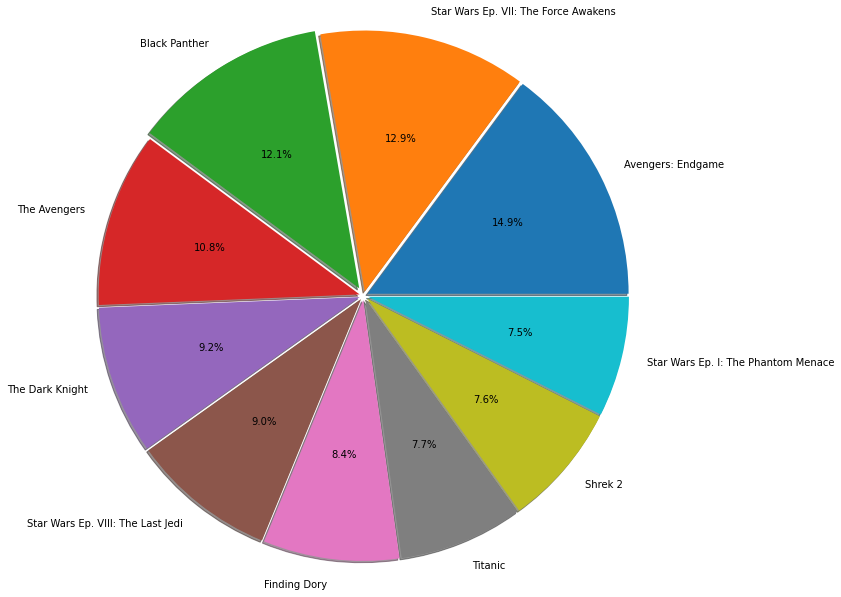

In [145]:
#ТОП 10  фильмов по заработку
plt.pie(df1['TOTAL FOR YEAR'][0:10], labels = df1['MOVIE'][0:10], autopct='%1.1f%%',explode = (0.05,0.05, 0.1,0.05,0.05,0.05,0.05,0.05,0.05,0.05),radius=3,shadow=True)

plt.show()

In [130]:
df1.head()

,MOVIE,TOTAL FOR YEAR
0,Batman Forever,184031112
1,Independence Day,306169255
2,Men in Black,250650052
3,Titanic,443319081
4,Star Wars Ep. I: The Phantom Menace,430443350


### TopGenres

In [147]:
TopGenres['TOTAL GROSS'] = TopGenres['TOTAL GROSS'].str.replace(',', '')
TopGenres['TOTAL GROSS'] = TopGenres['TOTAL GROSS'].str.replace('$', '')

TopGenres["TOTAL GROSS"] = TopGenres["TOTAL GROSS"].astype(str).astype(int)

/var/folders/0b/rfzwkbw94z36w4d3xrxrx1600000gn/T/ipykernel_12318/604449671.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  TopGenres['TOTAL GROSS'] = TopGenres['TOTAL GROSS'].str.replace('$', '')


Text(0.5, 1.0, 'Popular Genres')

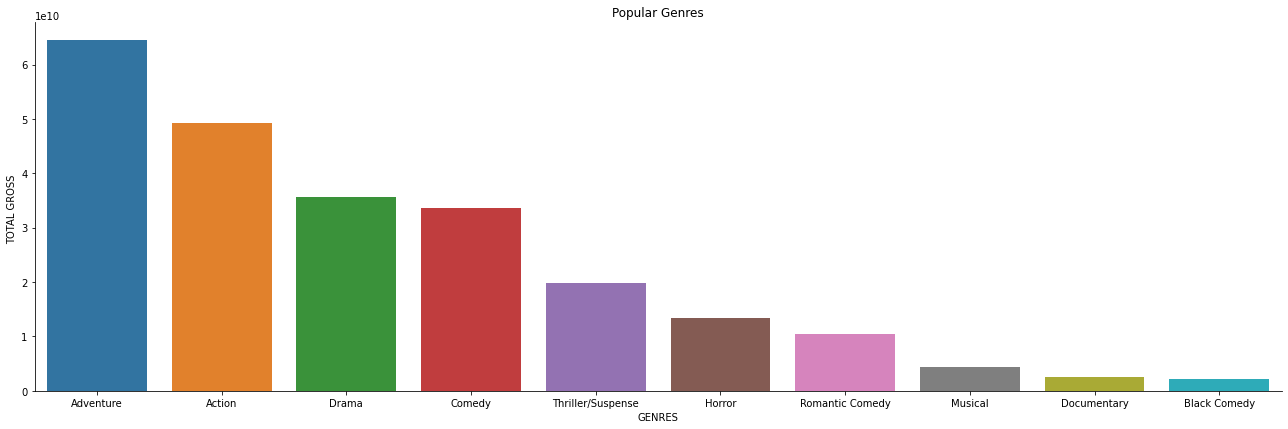

In [148]:
ax = sns.catplot(y="TOTAL GROSS", x="GENRES", kind="bar", data=TopGenres, height=6, aspect=3)
plt.ylabel("TOTAL GROSS ")
plt.title("Popular Genres")